In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab

import os
import json
import zipfile
import cv2
import imageio


pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#img_io = imageio.imread('../images/testdev2017/000000466319.jpg')
#plt.imshow(img_io)
#plt.show()

In [5]:
annType = ['segm','bbox','keypoints']
annType = annType[1]      #specify type here
prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
print('Running demo for *%s* results.'%(annType))

Running demo for *bbox* results.


In [7]:
#initialize COCO ground truth api
print(os.getcwd())
dataDir='../'
dataType='testdev2017'
annFile = '%s/annotations/%s_%s.json'%(dataDir,prefix,dataType)

with open('../annotations/instances_testdev2017.json', 'r') as f:
    gt = json.load(f)

print(gt['images'][0])   

cocoGt=COCO(annFile)


# load COCO categories
cats = cocoGt.loadCats(cocoGt.getCatIds())
print(cats[0])

# get all images containing given categories, select one at random
catIds = cocoGt.getCatIds(catNms=['person'])
imgIds = cocoGt.getImgIds(catIds=catIds)
imgIds = cocoGt.getImgIds(imgIds=[1])
img = cocoGt.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
img


/home/dh/Desktop/Gordon/CenterNet/data/coco/PythonAPI
{'width': 1280, 'id': 1, 'date_captured': '2013-11-14 11:04:33', 'license': 6, 'file_name': '000000000001.jpg', 'height': 960, 'coco_url': 'Find Gordon'}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
{'supercategory': 'person', 'name': 'person', 'id': 1}


{'coco_url': 'Find Gordon',
 'date_captured': '2013-11-14 11:04:33',
 'file_name': '000000000001.jpg',
 'height': 960,
 'id': 1,
 'license': 6,
 'width': 1280}

In [34]:
#initialize COCO detections api
resFile='../../../results/CenterNet-104/480000/testing/results_CenterNet_17_images.json'
with open(resFile, 'r') as f:
    results = json.load(f)

classes=[cat['name'] for cat in cats]    
    
det_count = 0
det_list = []
for item in results:
    if item["image_id"] == 16 and item["score"] >= 0.5:
        det_count = det_count + 1
        det_list.append((classes[item["category_id"]-1], item["score"], tuple(item["bbox"])))
        #print("Detection {}. = ".format(det_count) + str((classes[item["category_id"]-1], item["score"], tuple(item["bbox"]))))
print(det_list)

#resFile = resFile%(dataDir, prefix, dataType, annType)
cocoDt=cocoGt.loadRes(resFile)

[]
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


/home/gordonjun/Desktop/CV_Stuffs/CornerNet/data/coco/PythonAPI


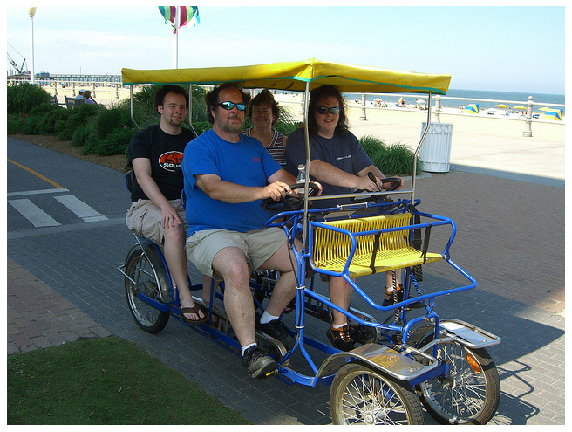

In [50]:
imgIds = cocoGt.getImgIds(imgIds = [466319])
img = cocoGt.loadImgs(imgIds)
file_name = img[0]['file_name']

print(os.getcwd())
I = io.imread('../images/testdev2017/000000466319.jpg')

plt.axis('off')
plt.imshow(I)
plt.show()


# load and display instance annotations
#annIds = cocoGt.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#anns = cocoGt.loadAnns(annIds)
#coco.showAnns(anns)

#plt.imshow(I)
#plt.axis('off')
#annIds = cocoGt.getAnnIds(imgIds=img[0]['id'], catIds=catIds, iscrowd=None)
#print(annIds)
#anns = cocoGt.loadAnns(annIds)
#cocoGt.showAnns(anns)

In [56]:
# running evaluation
E = COCOeval(cocoGt = cocoGt, cocoDt = cocoDt, iouType = annType)
#E.params.imgIds = 361851
E.evaluate()
E.accumulate()
E.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=77.65s).
Accumulating evaluation results...
DONE (t=17.28s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium |

None
